Dataset Link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("flight_satisfaction_train.csv", index_col = 0)
df_test = pd.read_csv("flight_satisfaction_test.csv", index_col = 0)
df_full = pd.concat([df_train, df_test])

## Exploratory Data Analysis

In [ ]:
for i in df_train.columns:
  print(i, ": ", df_train.iloc[0][i])

id :  70172
Gender :  Male
Customer Type :  Loyal Customer
Age :  13
Type of Travel :  Personal Travel
Class :  Eco Plus
Flight Distance :  460
Inflight wifi service :  3
Departure/Arrival time convenient :  4
Ease of Online booking :  3
Gate location :  1
Food and drink :  5
Online boarding :  3
Seat comfort :  5
Inflight entertainment :  5
On-board service :  4
Leg room service :  3
Baggage handling :  4
Checkin service :  4
Inflight service :  5
Cleanliness :  5
Departure Delay in Minutes :  25
Arrival Delay in Minutes :  18.0
satisfaction :  neutral or dissatisfied


In [ ]:
df_full.shape

(129880, 24)

In [ ]:
df_full.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
(df_full.groupby('satisfaction').count() / len(df_full))['id']

satisfaction
neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: id, dtype: float64

In [ ]:
(df_full.groupby('Gender').count() / len(df_full))['id']

Gender
Female    0.507384
Male      0.492616
Name: id, dtype: float64

In [ ]:
(df_full.groupby('Customer Type').count() / len(df_full))['id']

Customer Type
Loyal Customer       0.816908
disloyal Customer    0.183092
Name: id, dtype: float64

In [ ]:
(df_full.groupby('Type of Travel').count() / len(df_full))['id']

Type of Travel
Business travel    0.690584
Personal Travel    0.309416
Name: id, dtype: float64

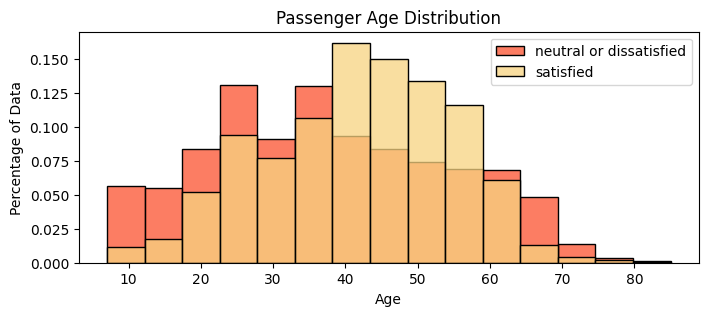

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 3))
# sns.histplot(df_full['Age'],stat="probability", bins = 5,
#                   color = '#fc522f')

# ax.set(xlabel='Age', ylabel='Percentage of Data')
# ax.set_title("Data Age Distribution")
# plt.show()



df_plot = df_full.copy()
# df_plot.shape
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
sns.histplot(df_plot[df_plot['satisfaction'] == 'neutral or dissatisfied']['Age'],
             stat="probability", bins = 15,
             color = '#fc522f')
sns.histplot(df_plot[df_plot['satisfaction'] == 'satisfied']['Age'],
             stat="probability", bins = 15,
             color = '#f7d380')
ax.set(xlabel='Age', ylabel='Percentage of Data')
ax.set_title("Passenger Age Distribution")
ax.legend(['neutral or dissatisfied', 'satisfied'])
plt.show()

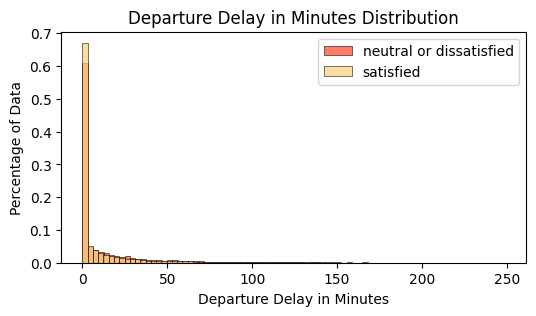

In [ ]:
# Departure Delay in Minutes :  25
# Arrival Delay in Minutes :  18.0
# satisfaction :  neutral or dissatisfied
df_plot = df_full[df_full['Departure Delay in Minutes'] < 250]
# df_plot.shape
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.histplot(df_plot[df_plot['satisfaction'] == 'neutral or dissatisfied']['Departure Delay in Minutes'],
             stat="probability", bins = 80,
             color = '#fc522f')
sns.histplot(df_plot[df_plot['satisfaction'] == 'satisfied']['Departure Delay in Minutes'],
             stat="probability", bins = 80,
             color = '#f7d380')
ax.set(xlabel='Departure Delay in Minutes', ylabel='Percentage of Data')
ax.set_title("Departure Delay in Minutes Distribution")
ax.legend(['neutral or dissatisfied', 'satisfied'])
plt.show()

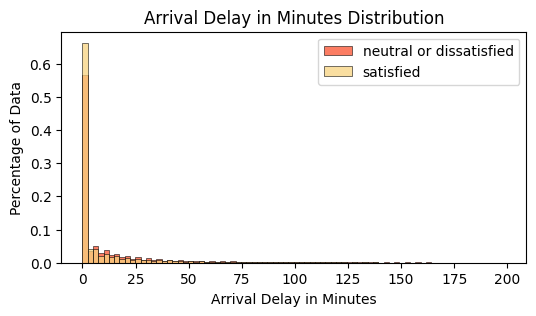

In [ ]:
df_plot = df_full[df_full['Arrival Delay in Minutes'] < 200]
df_plot.shape
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.histplot(df_plot[df_plot['satisfaction'] == 'neutral or dissatisfied']['Arrival Delay in Minutes'],
             stat="probability", bins = 80,
             color = '#fc522f')
sns.histplot(df_plot[df_plot['satisfaction'] == 'satisfied']['Arrival Delay in Minutes'],
             stat="probability", bins = 80,
             color = '#f7d380')
ax.set(xlabel='Arrival Delay in Minutes', ylabel='Percentage of Data')
ax.set_title("Arrival Delay in Minutes Distribution")
ax.legend(['neutral or dissatisfied', 'satisfied'])
plt.show()

## Data Transformation

In [3]:
df_trans = df_full.copy()

In [4]:
# check dups
df_trans.duplicated().sum()

0

In [5]:
# drop na
df_trans.dropna(inplace = True)
df_trans.shape

(129487, 24)

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     12948

In [6]:
# format columns
df_trans.columns = ['_'.join([w.lower() for w in i.split()]) for i in df_trans.columns]
df_trans.columns = ['_'.join(i.split('/')) for i in df_trans.columns]
df_trans.columns = ['_'.join(i.split('-')) for i in df_trans.columns]
df_trans.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [7]:
# one hot encode
encoded_data = pd.get_dummies(df_trans[['gender', 'customer_type', 'type_of_travel', 'class']])
df_trans.drop(['id', 'gender', 'customer_type', 'type_of_travel', 'class'], axis = 1, inplace = True)
df_trans = pd.concat([df_trans, encoded_data], axis = 1)

# 'Gender', 'Customer Type', 'Type of Travel', 'Class'

In [8]:
# map y
y_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
df_trans['satisfaction'] = df_trans['satisfaction'].map(y_mapping)

In [ ]:
df_trans.iloc[0]

age                                   13.0
flight_distance                      460.0
inflight_wifi_service                  3.0
departure_arrival_time_convenient      4.0
ease_of_online_booking                 3.0
gate_location                          1.0
food_and_drink                         5.0
online_boarding                        3.0
seat_comfort                           5.0
inflight_entertainment                 5.0
on_board_service                       4.0
leg_room_service                       3.0
baggage_handling                       4.0
checkin_service                        4.0
inflight_service                       5.0
cleanliness                            5.0
departure_delay_in_minutes            25.0
arrival_delay_in_minutes              18.0
satisfaction                           0.0
gender_Female                          0.0
gender_Male                            1.0
customer_type_Loyal Customer           1.0
customer_type_disloyal Customer        0.0
type_of_tra

In [9]:
from sklearn.model_selection import train_test_split

X_full = df_trans.drop(columns=['satisfaction'])
Y_full = df_trans['satisfaction']

X_train, X_test_val, Y_train, Y_test_val = train_test_split(X_full, Y_full, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(103589, 27)
(12949, 27)
(12949, 27)
(103589,)
(12949,)
(12949,)


## Model

In [ ]:
!pip install -U tensorflow

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
e=EarlyStopping(monitor='val_loss',
                patience=6,
                restore_best_weights=True,
                verbose=1)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               3584      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13953 (54.50 KB)
Trainable params: 13953 (54.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    callbacks=[e],
                    epochs=60, batch_size=128)

Epoch 1/60


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
806/810 [============================>.] - ETA: 0s - loss: 0.7969 - accuracy: 0.7109

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
810/810 [==============================] - 6s 6ms/step - loss: 0.7951 - accuracy: 0.7115 - val_loss: 0.3944 - val_accuracy: 0.8527
Epoch 2/60
810/810 [==============================] - 4s 4ms/step - loss: 0.4903 - accuracy: 0.8028 - val_loss: 0.4591 - val_accuracy: 0.8154
Epoch 3/60
810/810 [==============================] - 2s 3ms/step - loss: 0.4345 - accuracy: 0.8251 - val_loss: 0.3508 - val_accuracy: 0.8713
Epoch 4/60
810/810 [==============================] - 2s 3ms/step - loss: 0.4022 - accuracy: 0.8399 - val_loss: 0.3345 - val_accuracy: 0.8700
Epoch 5/60
810/810 [==============================] - 2s 3ms/step - loss: 0.3771 - accuracy: 0.8501 

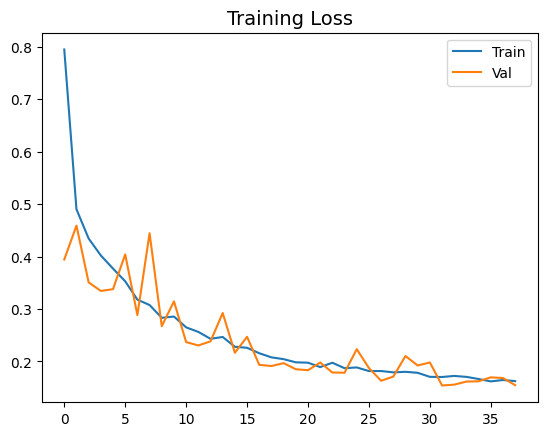

In [ ]:
train_history = pd.DataFrame(history.history)

train_history["loss"].plot(label="Train")
train_history["val_loss"].plot(label="Val")
plt.title("Training Loss", size=14)
plt.legend()
plt.show()

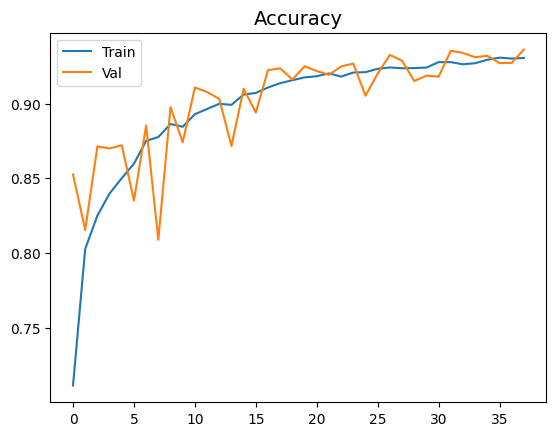

In [ ]:
train_history["accuracy"].plot(label="Train")
train_history["val_accuracy"].plot(label="Val")
plt.title("Accuracy", size=14)
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

102/102 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9324
Test Loss: 0.1622929871082306, Test Accuracy: 0.9324272274971008


## Model Regularization

In [ ]:
e=EarlyStopping(monitor='val_loss',
                patience=6,
                restore_best_weights=True,
                verbose=1)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    callbacks=[e],
                    epochs=60, batch_size=128)

Epoch 1/60


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
809/810 [============================>.] - ETA: 0s - loss: 1.7197 - accuracy: 0.5852

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
810/810 [==============================] - 6s 4ms/step - loss: 1.7194 - accuracy: 0.5852 - val_loss: 0.6526 - val_accuracy: 0.6614
Epoch 2/60
810/810 [==============================] - 3s 4ms/step - loss: 0.6597 - accuracy: 0.6344 - val_loss: 0.6431 - val_accuracy: 0.6550
Epoch 3/60
810/810 [==============================] - 3s 4ms/step - loss: 0.6513 - accuracy: 0.6411 - val_loss: 0.6378 - val_accuracy: 0.6673
Epoch 4/60
810/810 [==============================] - 5s 6ms/step - loss: 0.6427 - accuracy: 0.6490 - val_loss: 0.6228 - val_accuracy: 0.6502
Epoch 5/60
810/810 [==============================] - 4s 5ms/step - loss: 0.5587 - accuracy: 0.7270 

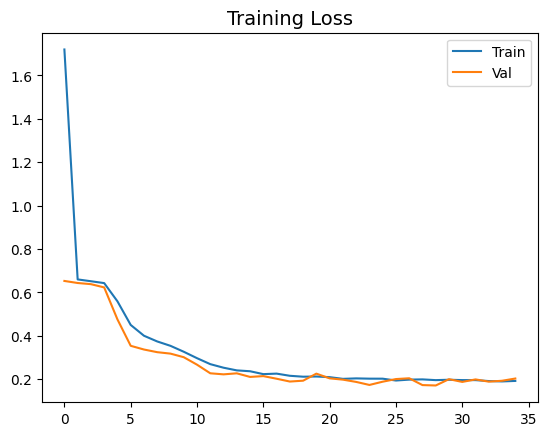

In [ ]:
train_history = pd.DataFrame(history.history)

train_history["loss"].plot(label="Train")
train_history["val_loss"].plot(label="Val")
plt.title("Training Loss", size=14)
plt.legend()
plt.show()

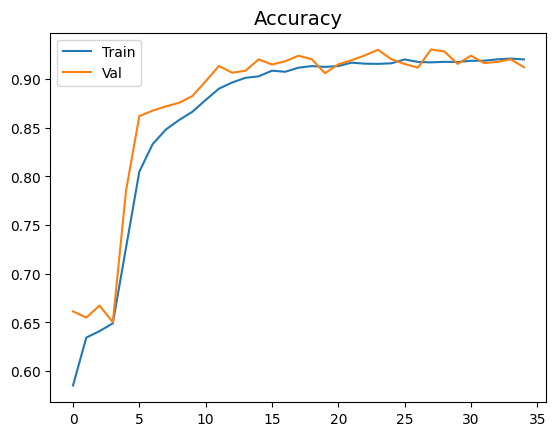

In [ ]:
train_history["accuracy"].plot(label="Train")
train_history["val_accuracy"].plot(label="Val")
plt.title("Accuracy", size=14)
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

102/102 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9254
Test Loss: 0.17452101409435272, Test Accuracy: 0.925399661064148


## Hyperparameter Tuning

In [ ]:
!pip install scikeras

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

In [16]:
def create_model():
  e=EarlyStopping(monitor='val_loss',
                patience=6,
                restore_best_weights=True,
                verbose=1)

  model = Sequential()
  model.add(Input(shape=(X_train.shape[1],)))
  model.add(Dense(128, activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
  return model


In [22]:
space = {'batch_size':[i for i in range(16, 129)]}
model = KerasClassifier(model=create_model, verbose=0)

search = RandomizedSearchCV(model, space, n_iter=5,
                            scoring='accuracy', n_jobs=-1,
                            random_state=42, verbose = 4)
# execute search
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Score: 0.8238136128044008
Best Hyperparameters: {'batch_size': 20}


In [29]:
pd.DataFrame([[i['batch_size'] for i in result.cv_results_['params']],
             result.cv_results_['mean_test_score'],
             result.cv_results_['rank_test_score']], index = ['Batch_Size', 'Scores', 'Rank']).T.sort_values('Batch_Size')

,Batch_Size,Scores,Rank
1,20.0,0.823814,1.0
4,26.0,0.816824,2.0
2,56.0,0.775468,5.0
3,85.0,0.803955,3.0
0,96.0,0.803908,4.0


In [ ]:
# batch_sizes = [16, 32, 64, 128, 256]

# results = {}
# for b in batch_sizes:


#   history = model.fit(X_train, Y_train,
#                     validation_data=(X_val, Y_val),
#                     callbacks=[e],
#                     epochs=60, batch_size=b)

#   loss, accuracy = model.evaluate(X_test, Y_test, batch_size=b)
#   results[b] = [loss, accuracy]

In [ ]:
# print(pd.DataFrame(results))

## Final Model

In [30]:
b = 20
e=EarlyStopping(monitor='val_loss',
                patience=6,
                restore_best_weights=True,
                verbose=1)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, Y_train,
                  validation_data=(X_val, Y_val),
                  callbacks=[e],
                  epochs=60, batch_size=b)

Epoch 1/60
5180/5180 [==============================] - 20s 3ms/step - loss: 0.6520 - accuracy: 0.7719 - val_loss: 0.3364 - val_accuracy: 0.8676
Epoch 2/60
5180/5180 [==============================] - 17s 3ms/step - loss: 0.3687 - accuracy: 0.8484 - val_loss: 0.3133 - val_accuracy: 0.8803
Epoch 3/60
5180/5180 [==============================] - 18s 4ms/step - loss: 0.3330 - accuracy: 0.8642 - val_loss: 0.2718 - val_accuracy: 0.8930
Epoch 4/60
5180/5180 [==============================] - 16s 3ms/step - loss: 0.2846 - accuracy: 0.8840 - val_loss: 0.2453 - val_accuracy: 0.9010
Epoch 5/60
5180/5180 [==============================] - 16s 3ms/step - loss: 0.2435 - accuracy: 0.8991 - val_loss: 0.2000 - val_accuracy: 0.9183
Epoch 6/60
5180/5180 [==============================] - 16s 3ms/step - loss: 0.2178 - accuracy: 0.9094 - val_loss: 0.1892 - val_accuracy: 0.9182
Epoch 7/60
5180/5180 [==============================] - 16s 3ms/step - loss: 0.2056 - accuracy: 0.9143 - val_loss: 0.1920 - val_ac

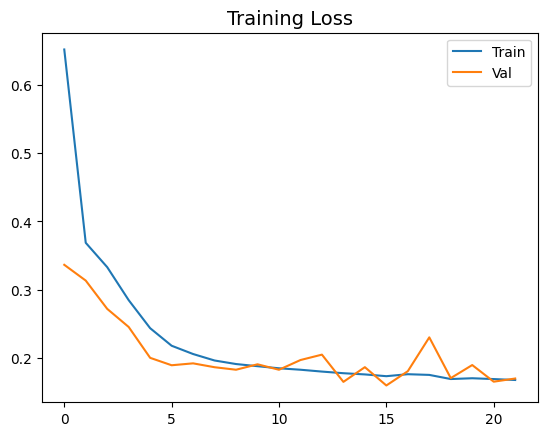

In [31]:
train_history = pd.DataFrame(history.history)

train_history["loss"].plot(label="Train")
train_history["val_loss"].plot(label="Val")
plt.title("Training Loss", size=14)
plt.legend()
plt.show()

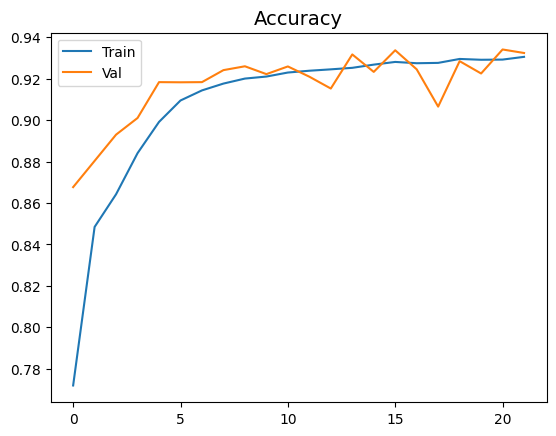

In [32]:
train_history["accuracy"].plot(label="Train")
train_history["val_accuracy"].plot(label="Val")
plt.title("Accuracy", size=14)
plt.legend()
plt.show()

## Evaluation

In [33]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
predictions = model.predict(X_test)
Y_pred = [i[0].round() for i in predictions]

405/405 [==============================] - 1s 2ms/step


In [35]:
# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7349
           1       0.93      0.91      0.92      5600

    accuracy                           0.93     12949
   macro avg       0.93      0.93      0.93     12949
weighted avg       0.93      0.93      0.93     12949



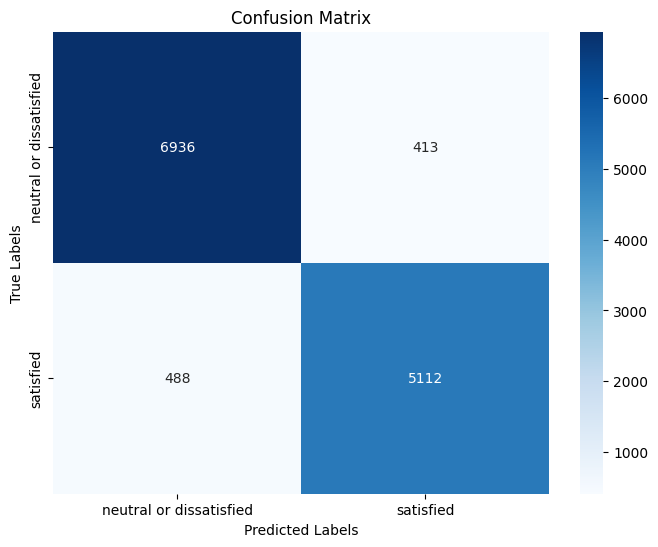

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_mapping.keys(), yticklabels=y_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()